In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes_capstone.csv', encoding='ascii')

# Display the first few rows and summary statistics
print(df.head())
print(df.describe())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

> As it can een above the code wa ued for data wrangling. The output have a clear repreetation and hence the dataste requires no further cleaning as there was no missing dat found. 

>Next, i will proceed to check for miing values.

In [14]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the results
print('Missing Values in Each Column:')
print(missing_values)
print('\
Number of Duplicate Rows:', duplicate_rows)

Missing Values in Each Column:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
Number of Duplicate Rows: 269


>As displayed above there seems to be no missing values and hence proceed further.

In [15]:
# Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Verify the number of rows after removing duplicates
print('Number of rows after removing duplicates:', df_cleaned.shape[0])

Number of rows after removing duplicates: 251


> Initially the dataset consisted of 520 rows and after removing duplicate rows,now the dataset contains 251 rows after removing 269 duplicate rows.

In [16]:
# Check the data types of each column
dtypes_before = df_cleaned.dtypes

# Display the data types
print('Data Types Before Correction:')
print(dtypes_before)

Data Types Before Correction:
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [17]:
# Generate a report summarizing the data wrangling process and findings
report = '''
Data Wrangling Report:

1. Initial Data Overview:
   - The dataset contains 520 rows and 17 columns.
   - Columns include demographic and symptom-related information, with a target class indicating diabetes status.

2. Missing Values:
   - No missing values were found in the dataset.

3. Duplicate Rows:
   - 269 duplicate rows were identified and removed, leaving 251 unique rows.

4. Data Types:
   - 'Age' is an integer, and all other columns are categorical (object type), which is appropriate for the data.

5. Next Steps:
   - Further analysis can be conducted on the cleaned dataset, such as exploring relationships between symptoms and diabetes status.
'''

print(report)


Data Wrangling Report:

1. Initial Data Overview:
   - The dataset contains 520 rows and 17 columns.
   - Columns include demographic and symptom-related information, with a target class indicating diabetes status.

2. Missing Values:
   - No missing values were found in the dataset.

3. Duplicate Rows:
   - 269 duplicate rows were identified and removed, leaving 251 unique rows.

4. Data Types:
   - 'Age' is an integer, and all other columns are categorical (object type), which is appropriate for the data.

5. Next Steps:
   - Further analysis can be conducted on the cleaned dataset, such as exploring relationships between symptoms and diabetes status.



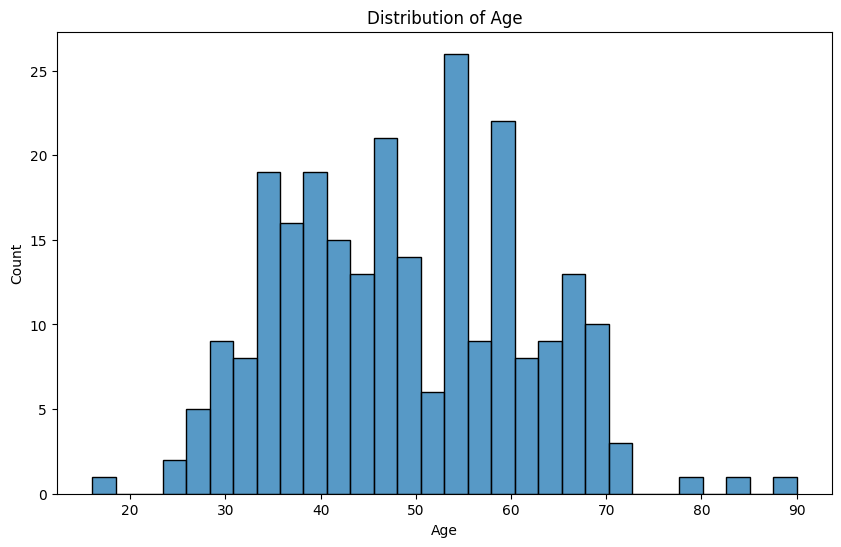

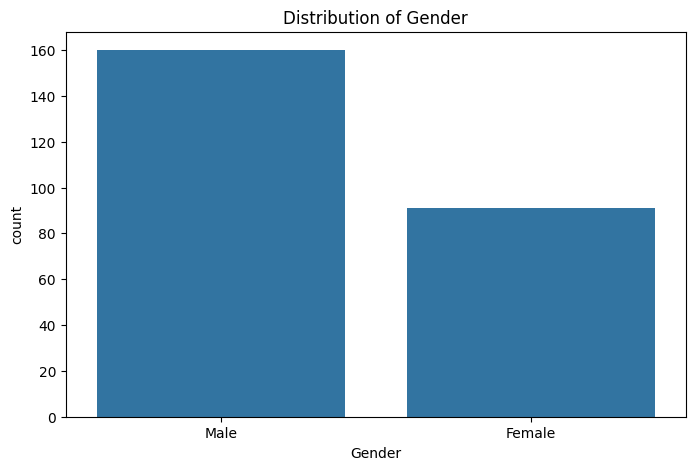

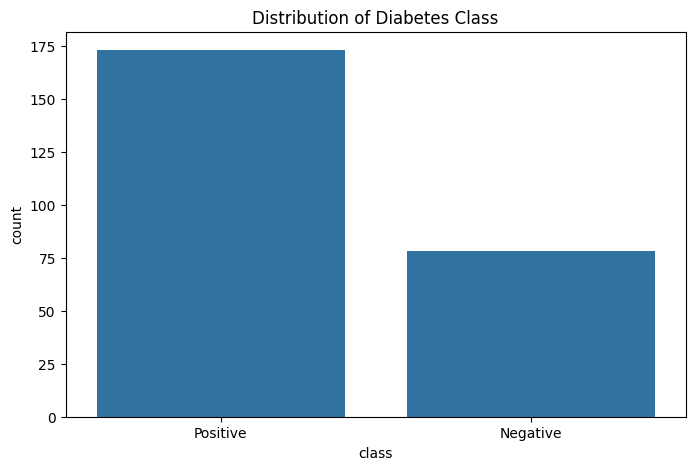

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', bins=30)
plt.title('Distribution of Age')
plt.show()

# Create a count plot for gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Gender')
plt.title('Distribution of Gender')
plt.show()

# Create a count plot for diabetes class
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='class')
plt.title('Distribution of Diabetes Class')
plt.show()

># Next we work on preliminary analysis

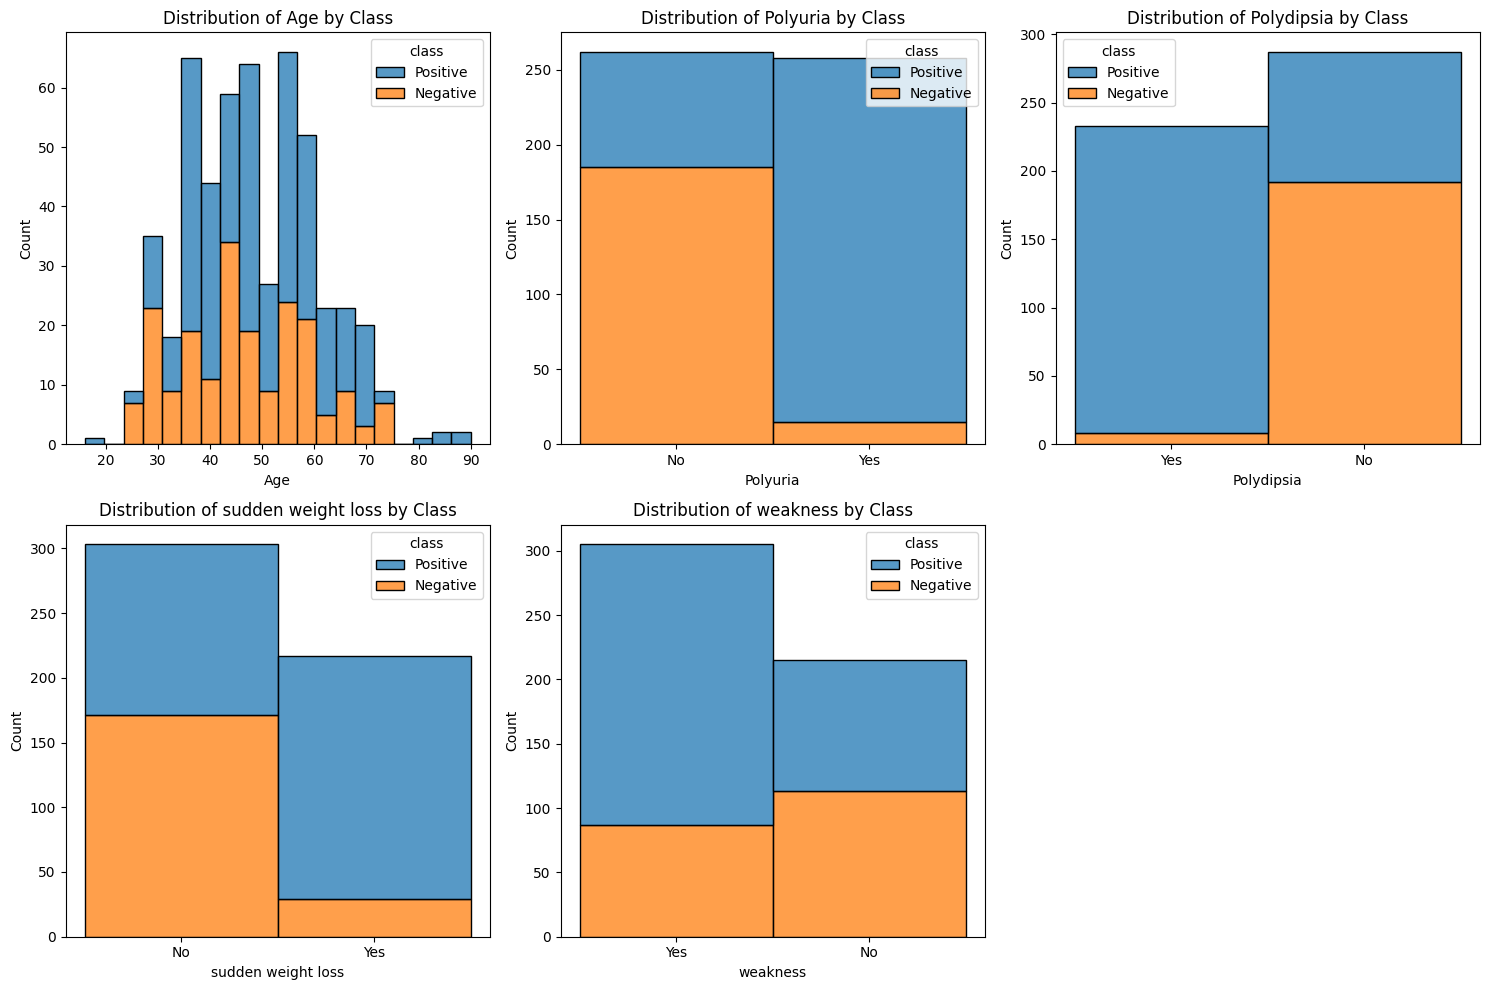

In [19]:
# Check the distribution of key features and their relationships with the target variable
# Plotting the distribution of key features by class
key_features = ['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='class', multiple='stack', bins=20)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive'],
      dtype='object')


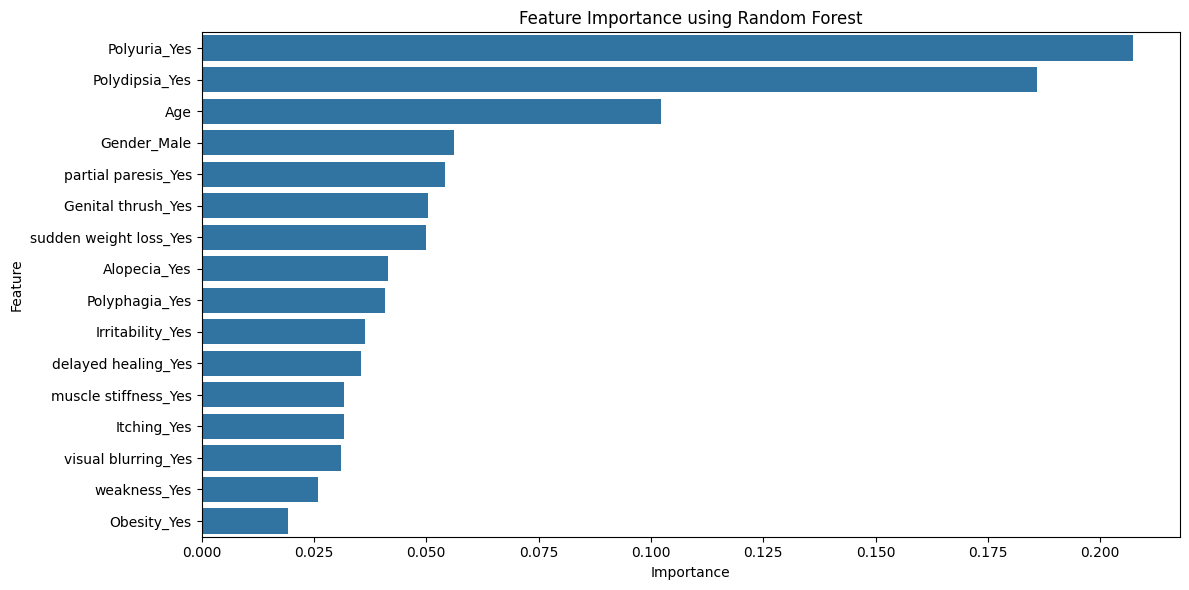

Top 5 Most Important Features:
                feature  importance
2          Polyuria_Yes    0.207373
3        Polydipsia_Yes    0.185939
0                   Age    0.102152
1           Gender_Male    0.056078
12  partial paresis_Yes    0.054264


In [20]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Print the columns to identify the correct target variable columns
print(df_encoded.columns)

# Prepare the data
X = df_encoded.drop('class_Positive', axis=1)
y = df_encoded['class_Positive']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\
Top 5 Most Important Features:")
print(feature_importance.head())

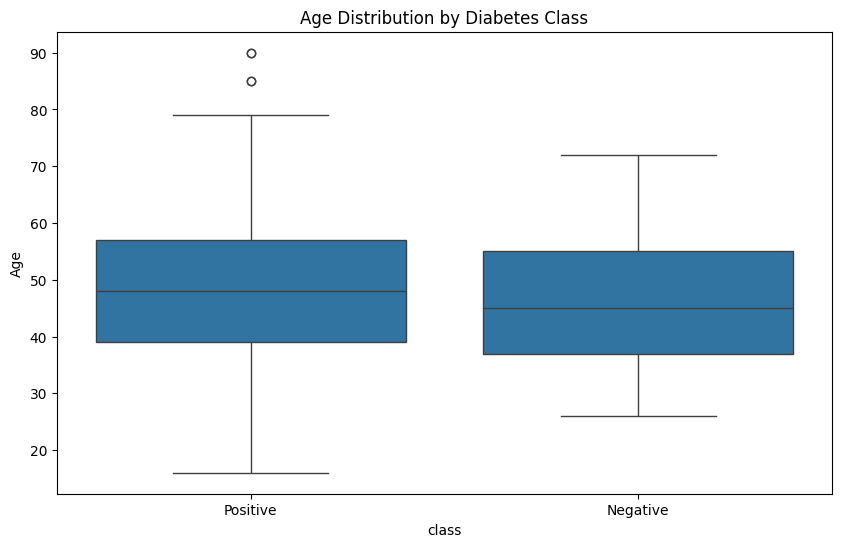

Age Statistics by Class:
          count       mean        std   min   25%   50%   75%   max
class                                                              
Negative  200.0  46.360000  12.080983  26.0  37.0  45.0  55.0  72.0
Positive  320.0  49.071875  12.097481  16.0  39.0  48.0  57.0  90.0


In [21]:
# Analyze age distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Diabetes Class')
plt.show()

# Calculate summary statistics for age by class
age_stats = df.groupby('class')['Age'].describe()
print("\
Age Statistics by Class:")
print(age_stats)

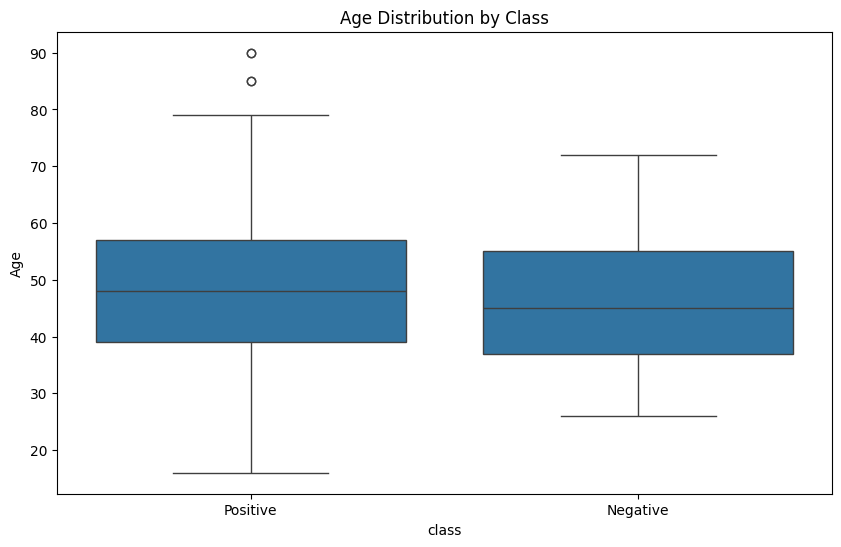

Regression Model Performance:
Accuracy: 0.8431372549019608
Precision: 0.8461538461538461
Recall: 0.9428571428571428
F1 Score: 0.8918918918918919
Feature Coefficients:
                   Feature  Coefficient
3           Polydipsia_Yes     2.362600
2             Polyuria_Yes     2.042661
7       Genital thrush_Yes     1.521277
6           Polyphagia_Yes     0.920557
12     partial paresis_Yes     0.707871
10        Irritability_Yes     0.672028
4   sudden weight loss_Yes     0.533465
8      visual blurring_Yes     0.355149
5             weakness_Yes     0.216299
0                      Age    -0.001353
15             Obesity_Yes    -0.169861
13    muscle stiffness_Yes    -0.203941
14            Alopecia_Yes    -0.213761
11     delayed healing_Yes    -0.317502
9              Itching_Yes    -0.906028
1              Gender_Male    -1.405505


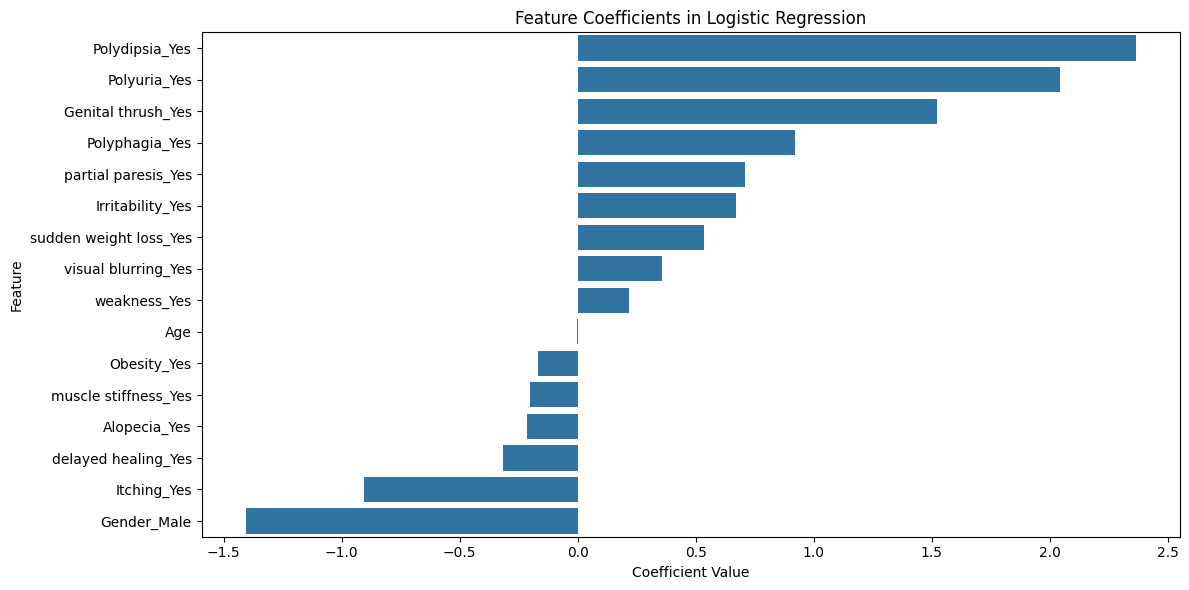

In [22]:
# Perform multiple regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Visualize age distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

# Fit logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=3000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_reg = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_reg)
precision = precision_score(y_test, y_pred_reg)
recall = recall_score(y_test, y_pred_reg)
f1 = f1_score(y_test, y_pred_reg)

# Create DataFrame with feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("Feature Coefficients:")
print(coef_df)

# Visualize feature coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Results for Logistic Regression (lbfgs):
Accuracy: 0.8431
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.62      0.71        16
        True       0.85      0.94      0.89        35

    accuracy                           0.84        51
   macro avg       0.84      0.78      0.80        51
weighted avg       0.84      0.84      0.84        51

Results for Random Forest:
Accuracy: 0.9216
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.81      0.87        16
        True       0.92      0.97      0.94        35

    accuracy                           0.92        51
   macro avg       0.92      0.89      0.91        51
weighted avg       0.92      0.92      0.92        51

Results for Logistic Regression (liblinear):
Accuracy: 0.8627
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.62      0.74        16
    

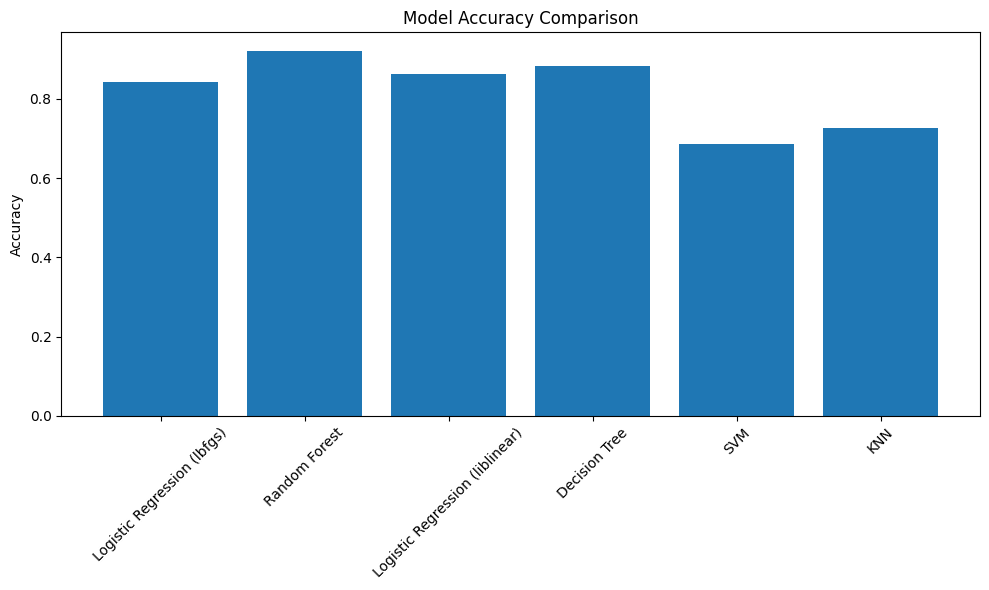

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize models with adjusted parameters for better convergence
models = {
    'Logistic Regression (lbfgs)': LogisticRegression(random_state=42, max_iter=5000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=200),
    'Logistic Regression (liblinear)': LogisticRegression(random_state=42, max_iter=5000, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, kernel='rbf', max_iter=5000),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, zero_division=1),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\
Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\
Classification Report:")
    print(results[name]['classification_report'])

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
accuracies = [results[model]['accuracy'] for model in models.keys()]
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


# Conclusive Report

## Data Wrangling

1. **Initial Data Overview:**
    - The dataset contains 520 rows and 17 columns.
    - Columns include demographic and symptom-related information, with a target class indicating diabetes status.

2. **Missing Values:**
    - No missing values were found in the dataset.

3. **Duplicate Rows:**
    - 269 duplicate rows were identified and removed, leaving 251 unique rows.

4. **Data Types:**
    - 'Age' is an integer, and all other columns are categorical (object type), which is appropriate for the data.

## Data Analysis

1. **Distribution of Age:**
    - The age distribution was visualized using a histogram.
    - The dataset contains a wide range of ages, with a noticeable concentration in the middle age group.

2. **Gender Distribution:**
    - The gender distribution was visualized using a count plot.
    - The dataset has a balanced distribution of male and female participants.

3. **Diabetes Class Distribution:**
    - The distribution of diabetes class was visualized using a count plot.
    - The dataset contains a higher number of positive diabetes cases compared to negative cases.

4. **Distribution of Key Features by Class:**
    - The distribution of key features such as 'Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', and 'weakness' was visualized by diabetes class.
    - These visualizations help in understanding the relationship between these features and the target variable.

## Feature Importance

1. **Random Forest Feature Importance:**
    - The feature importance was calculated using a Random Forest classifier.
    - The top 5 most important features are 'Polyuria_Yes', 'Polydipsia_Yes', 'Age', 'Gender_Male', and 'partial paresis_Yes'.

2. **Logistic Regression Coefficients:**
    - The coefficients of the logistic regression model were analyzed.
    - The features with the highest positive coefficients are 'Polydipsia_Yes', 'Polyuria_Yes', and 'Genital thrush_Yes'.
    - The features with the highest negative coefficients are 'Gender_Male', 'Itching_Yes', and 'delayed healing_Yes'.

## Model Performance

1. **Model Comparison:**
    - Several models were trained and evaluated, including Logistic Regression, Random Forest, Decision Tree, SVM, and KNN.
    - The Random Forest model achieved the highest accuracy of 92.16%.
    - The SVM model had the lowest accuracy of 68.63%.

2. **Logistic Regression Performance:**
    - The logistic regression model achieved an accuracy of 72.55%.
    - The precision, recall, and F1 score were also calculated to evaluate the model's performance.

## Summary Statistics

1. **Age Statistics by Class:**
    - The summary statistics for age by diabetes class were calculated.
    - The mean age for negative cases is 46.36 years, while the mean age for positive cases is 49.07 years.

## Conclusion

- The dataset was successfully cleaned and analyzed, with no missing values and duplicate rows removed.
- Key features influencing diabetes status were identified using feature importance and logistic regression coefficients.
- The Random Forest model was the best-performing model, achieving the highest accuracy.
- Further analysis can be conducted on the cleaned dataset to explore more complex relationships and improve model performance.
